# I. Prezentara bazei de date si importarile bibliotecilor necesare

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path='/content/drive/MyDrive/Econometrie-avansata/loan_data_Full.csv'
df = pd.read_csv(file_path)

In [5]:
# Primele 5 inregistrari din BD
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [6]:
# Verificam dimensiunea si tipurile de date
print(df.info())
print("\n\n","\t\t\tStatistici descriptive","\n")
print(df.describe().T)

# Formatăm valorile pentru a avea separator de mii și fără notație științifică
pd.options.display.float_format = '{:,.2f}'.format


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

 Întrucât denumirile coloanelor erau lungi și greu de citit, le vom redenumi într-un mod mai scurt și sugestiv

In [7]:
# Dicționar de mapare pentru redenumirea coloanelor
rename_columns = {
    'person_age': 'age',
    'person_gender': 'gender',
    'person_education': 'education',
    'person_income': 'income',
    'person_emp_exp': 'exp_years',
    'person_home_ownership': 'home_owner',
    'loan_amnt': 'loan_amt',
    'loan_intent': 'loan_purpose',
    'loan_int_rate': 'int_rate',
    'loan_percent_income': 'income_ratio',
    'cb_person_cred_hist_length': 'cred_hist_len',
    'credit_score': 'cred_score',
    'previous_loan_defaults_on_file': 'has_default'
    # 'loan_status' rămâne neschimbat
}

df.rename(columns=rename_columns, inplace=True)

df.head()

,age,gender,education,income,exp_years,home_owner,loan_amt,loan_purpose,int_rate,income_ratio,cred_hist_len,cred_score,has_default,loan_status
0,22.00,female,Master,"71,948.00",0,RENT,"35,000.00",PERSONAL,16.02,0.49,3.00,561,No,1
1,21.00,female,High School,"12,282.00",0,OWN,"1,000.00",EDUCATION,11.14,0.08,2.00,504,Yes,0
2,25.00,female,High School,"12,438.00",3,MORTGAGE,"5,500.00",MEDICAL,12.87,0.44,3.00,635,No,1
3,23.00,female,Bachelor,"79,753.00",0,RENT,"35,000.00",MEDICAL,15.23,0.44,2.00,675,No,1
4,24.00,male,Master,"66,135.00",1,RENT,"35,000.00",MEDICAL,14.27,0.53,4.00,586,No,1


In [8]:
# Verificam daca avem valori lipsa

missing_values=df.isnull().sum()
print('Valori lipsă per coloană: ')
print(missing_values)

Valori lipsă per coloană: 
age              0
gender           0
education        0
income           0
exp_years        0
home_owner       0
loan_amt         0
loan_purpose     0
int_rate         0
income_ratio     0
cred_hist_len    0
cred_score       0
has_default      0
loan_status      0
dtype: int64


#II. Analiza Exploratorie a Datelor (EDA)

#####    II. 1 Variabila 'age'

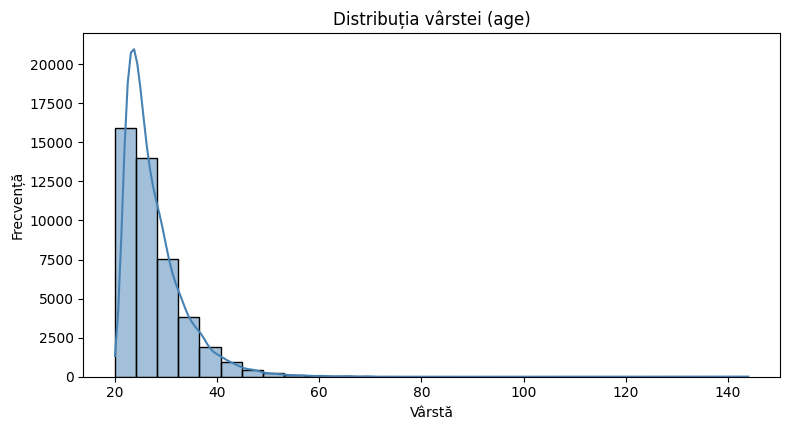

In [9]:
# Distributia variabilei 'age'

plt.figure(figsize=(8, 4.4))
sns.histplot(df['age'], bins=30, kde=True, color='steelblue')
plt.title("Distribuția vârstei (age)")
plt.xlabel("Vârstă")
plt.ylabel("Frecvență")
plt.tight_layout()
plt.show()

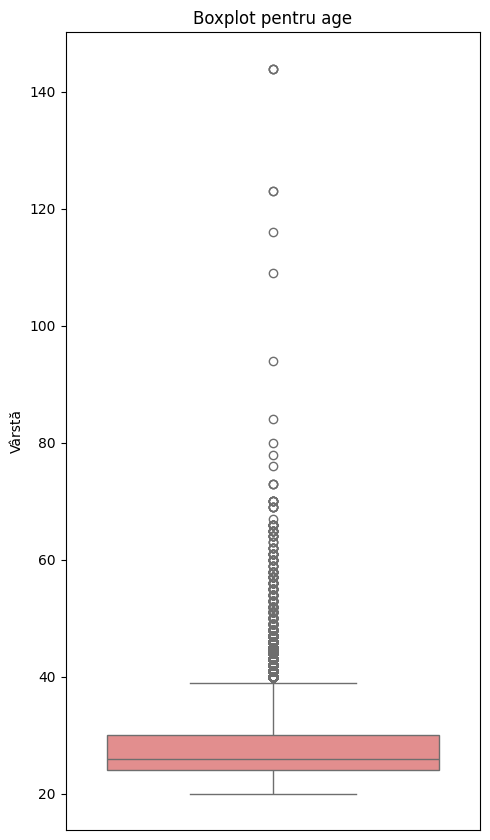

In [10]:
# Box plot

plt.figure(figsize=(5, 8.5))
sns.boxplot(y=df['age'], color='lightcoral', orient='v')
plt.title("Boxplot pentru age")
plt.ylabel("Vârstă")
plt.xticks([])
plt.tight_layout()
plt.show()

Observam prezenta valorilor aberante, asadar vom rezolva aceasta problema in urmatoarele celule de cod

In [11]:
# Winsorizam (capăm) vârsta maximă la 60

df['age'] = df['age'].apply(lambda x: min(x, 60))

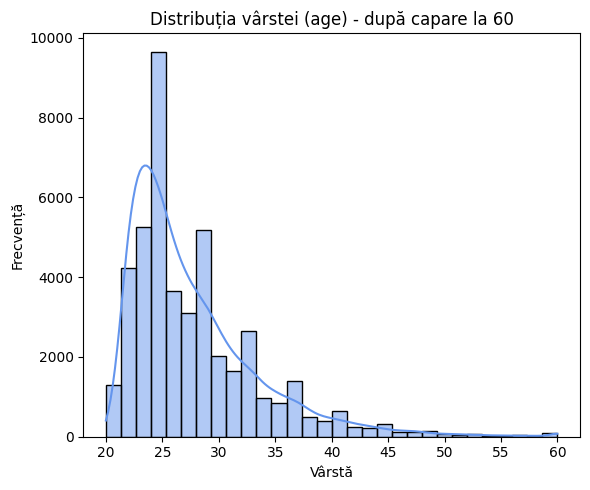

In [12]:
# Noua histogramă

plt.figure(figsize=(6, 5))
sns.histplot(df['age'], bins=30, kde=True, color='cornflowerblue')
plt.title("Distribuția vârstei (age) - după capare la 60")
plt.xlabel("Vârstă")
plt.ylabel("Frecvență")
plt.tight_layout()
plt.show()

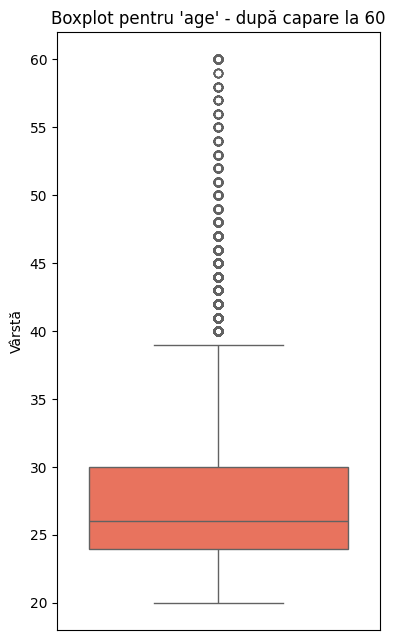

In [13]:
# Noul box-plot

plt.figure(figsize=(4, 6.5))
sns.boxplot(y=df['age'], color='tomato', orient='v')
plt.title("Boxplot pentru 'age' - după capare la 60")
plt.ylabel("Vârstă")
plt.xticks([])
plt.tight_layout()
plt.show()

In [14]:
print("Statistici descriptive pentru 'age':")
print(df['age'].describe())

Statistici descriptive pentru 'age':
count   45,000.00
mean        27.74
std          5.86
min         20.00
25%         24.00
50%         26.00
75%         30.00
max         60.00
Name: age, dtype: float64


<ipython-input-15-2184db59672a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y='age', palette='Set1')


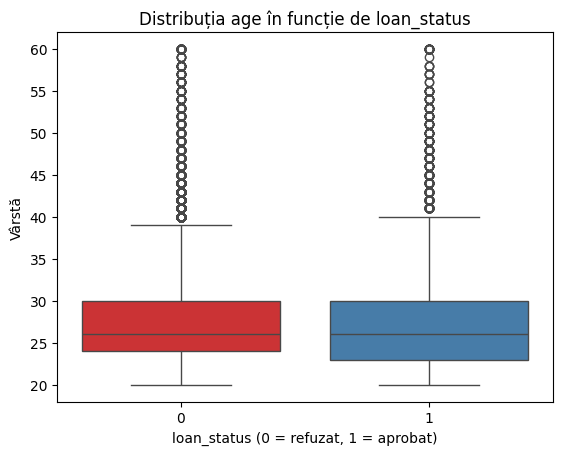

In [15]:
# Distribuția age în funcție de loan_status

sns.boxplot(data=df, x='loan_status', y='age', palette='Set1')
plt.title("Distribuția age în funcție de loan_status")
plt.xlabel("loan_status (0 = refuzat, 1 = aprobat)")
plt.ylabel("Vârstă")
plt.show()

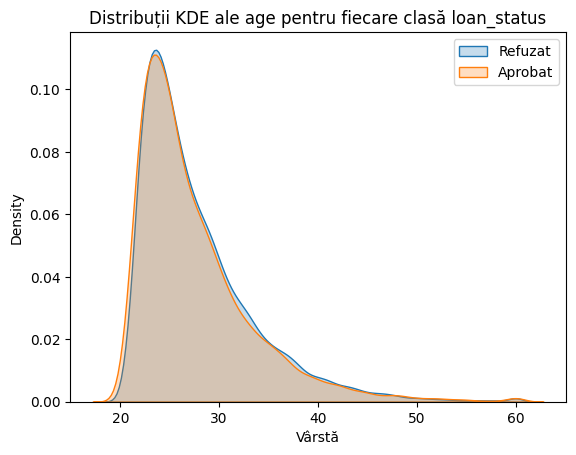

In [16]:
# Kernel Density Estimate (KDE) pe clase de loan_status

sns.kdeplot(data=df[df['loan_status'] == 0]['age'], label='Refuzat', fill=True)
sns.kdeplot(data=df[df['loan_status'] == 1]['age'], label='Aprobat', fill=True)
plt.title("Distribuții KDE ale age pentru fiecare clasă loan_status")
plt.xlabel("Vârstă")
plt.legend()
plt.show()

In [17]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corrs = df[numeric_cols].corr()['loan_status'].sort_values(ascending=False)
print("Corelații între age și alte variabile numerice:")
print(corrs)

Corelații între age și alte variabile numerice:
loan_status      1.00
income_ratio     0.38
int_rate         0.33
loan_amt         0.11
cred_score      -0.01
cred_hist_len   -0.01
exp_years       -0.02
age             -0.02
income          -0.14
Name: loan_status, dtype: float64


##### II. 2 Variabila 'gender'

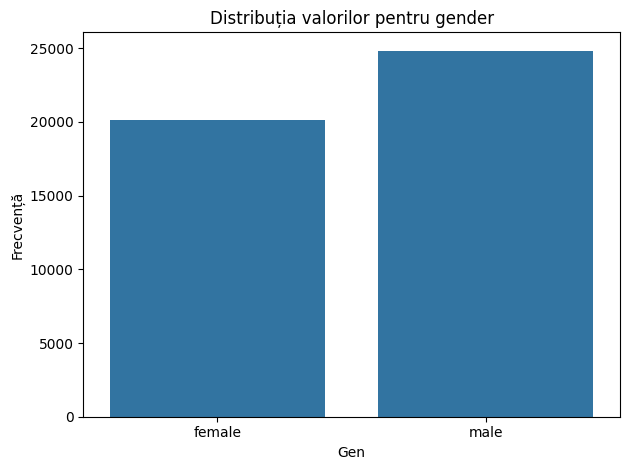

In [18]:
# Frecvența valorilor

sns.countplot(data=df, x='gender')
plt.title("Distribuția valorilor pentru gender")
plt.xlabel("Gen")
plt.ylabel("Frecvență")
plt.tight_layout()
plt.show()

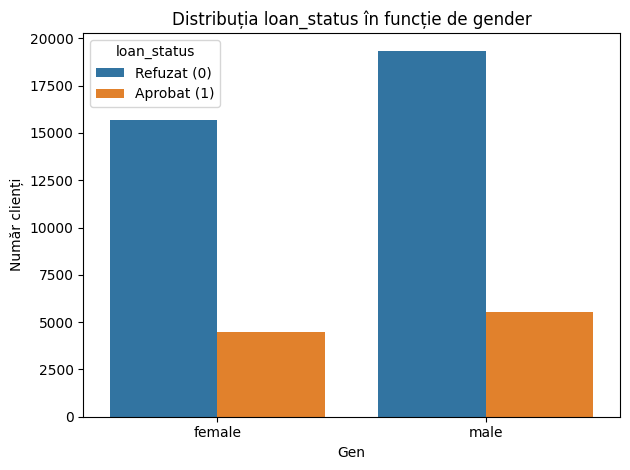

In [19]:
# Distribuția gender în funcție de loan_status

sns.countplot(data=df, x='gender', hue='loan_status')
plt.title("Distribuția loan_status în funcție de gender")
plt.xlabel("Gen")
plt.ylabel("Număr clienți")
plt.legend(title='loan_status', labels=['Refuzat (0)', 'Aprobat (1)'])
plt.tight_layout()
plt.show()

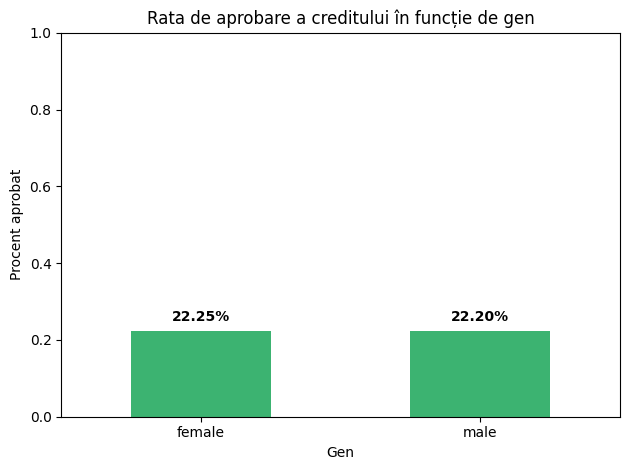

In [20]:
# Rată de aprobare per gen (procentual)

# Calculam rata de aprobare
approval_by_gender = df.groupby('gender')['loan_status'].mean()

# Creem graficul
ax = approval_by_gender.plot(kind='bar', color='mediumseagreen')

# Adaugam titluri și axe
plt.title("Rata de aprobare a creditului în funcție de gen")
plt.ylabel("Procent aprobat")
plt.xlabel("Gen")
plt.ylim(0, 1)
plt.xticks(rotation=0)

# Adaugam etichete cu procente deasupra fiecărei bare
for i, v in enumerate(approval_by_gender):
    ax.text(i, v + 0.02, f"{v:.2%}", ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [21]:
# Codificam numeric variabila gen

df['gender'] = df['gender'].map({'female': 0, 'male': 1})

##### II. 3 Variabila 'education'

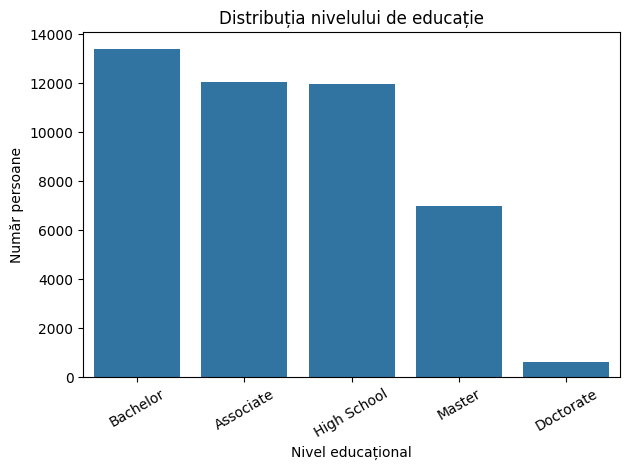

In [22]:
# Frecvența valorilor

sns.countplot(data=df, x='education', order=df['education'].value_counts().index)
plt.title("Distribuția nivelului de educație")
plt.xlabel("Nivel educațional")
plt.ylabel("Număr persoane")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

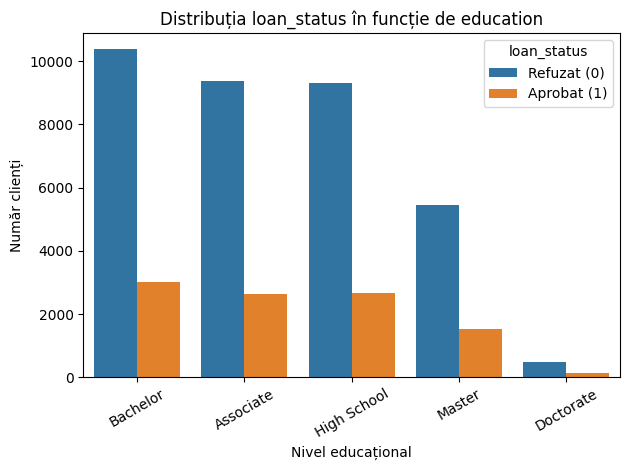

In [23]:
# Distribuție education în funcție de loan_status

sns.countplot(data=df, x='education', hue='loan_status',
              order=df['education'].value_counts().index)
plt.title("Distribuția loan_status în funcție de education")
plt.xlabel("Nivel educațional")
plt.ylabel("Număr clienți")
plt.legend(title='loan_status', labels=['Refuzat (0)', 'Aprobat (1)'])
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

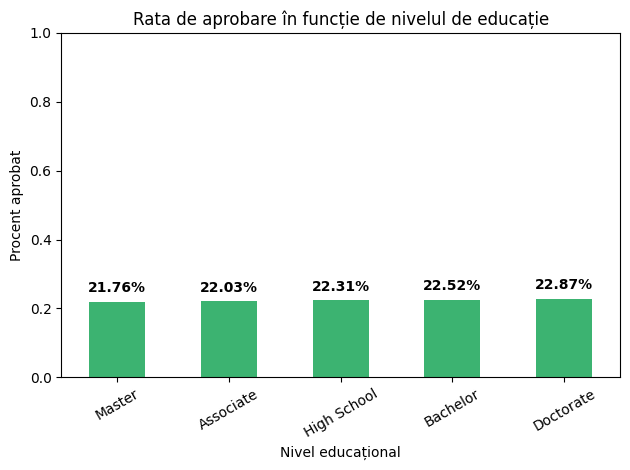

In [24]:
# Rată de aprobare per nivel educațional (cu procente pe bare)

approval_by_edu = df.groupby('education')['loan_status'].mean().sort_values()

ax = approval_by_edu.plot(kind='bar', color='mediumseagreen')
plt.title("Rata de aprobare în funcție de nivelul de educație")
plt.ylabel("Procent aprobat")
plt.xlabel("Nivel educațional")
plt.ylim(0, 1)
plt.xticks(rotation=30)

# Etichete cu procente
for i, v in enumerate(approval_by_edu):
    ax.text(i, v + 0.02, f"{v:.2%}", ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

Vom transforma variabila education in variabila ordinala, codificand-o numeric de la 1 (liceu) la 5 (doctorat)

In [25]:
# Definim maparea ordonată
edu_order = {
    'High School': 1,
    'Associate': 2,
    'Bachelor': 3,
    'Master': 4,
    'Doctorate': 5
}

# Aplicăm maparea pe coloana education
df['education'] = df['education'].map(edu_order)

In [26]:
print(df['education'].unique())

[4 1 3 2 5]


##### II.4 Variabila 'income'

In [27]:
# Statistici descriptive

print("Statistici descriptive pentru 'income':")
print(df['income'].describe())
print(f"\nSkewness: {df['income'].skew():.2f}")
print(f"Kurtosis: {df['income'].kurtosis():.2f}")

Statistici descriptive pentru 'income':
count      45,000.00
mean       80,319.05
std        80,422.50
min         8,000.00
25%        47,204.00
50%        67,048.00
75%        95,789.25
max     7,200,766.00
Name: income, dtype: float64

Skewness: 34.14
Kurtosis: 2398.68


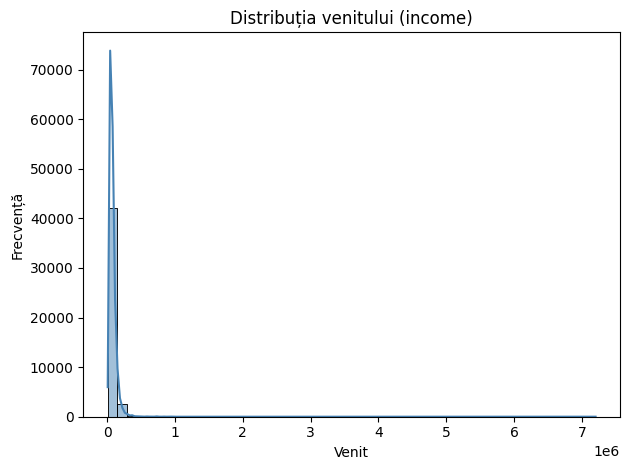

In [28]:
# Histogramă + KDE (distribuție generală)

sns.histplot(df['income'], bins=50, kde=True, color='steelblue')
plt.title("Distribuția venitului (income)")
plt.xlabel("Venit")
plt.ylabel("Frecvență")
plt.tight_layout()
plt.show()

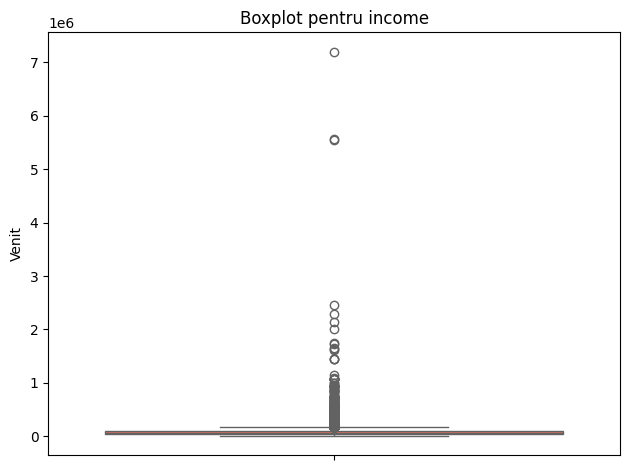

In [29]:
# Boxplot pentru detectarea outlierilor

sns.boxplot(y=df['income'], color='tomato')
plt.title("Boxplot pentru income")
plt.ylabel("Venit")
plt.tight_layout()
plt.show()

In [30]:
# Winsorizam, intrucat avem outlieri superiori extremi
upper_limit = df['income'].quantile(0.99)
df['income'] = df['income'].apply(lambda x: min(x, upper_limit))

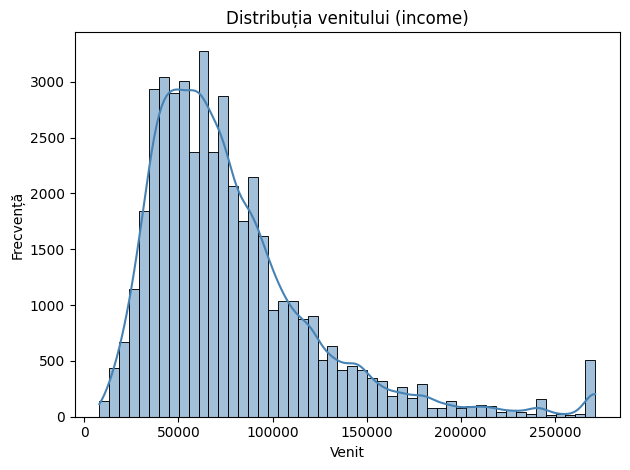

In [31]:
# Noua histograma
sns.histplot(df['income'], bins=50, kde=True, color='steelblue')
plt.title("Distribuția venitului (income)")
plt.xlabel("Venit")
plt.ylabel("Frecvență")
plt.tight_layout()
plt.show()

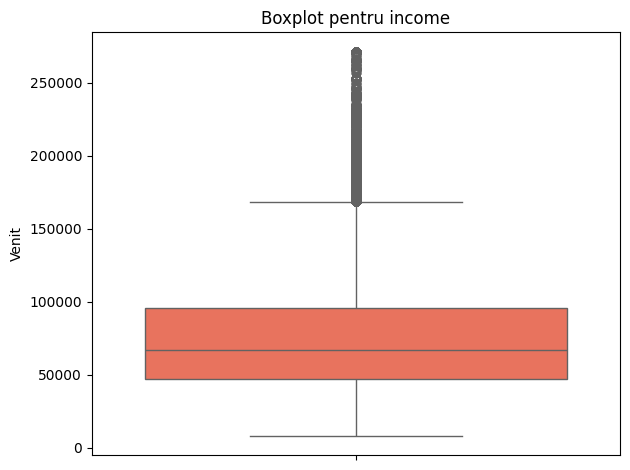

In [32]:
# Noul box-plot

sns.boxplot(y=df['income'], color='tomato')
plt.title("Boxplot pentru income")
plt.ylabel("Venit")
plt.tight_layout()
plt.show()

<ipython-input-33-bb542c864143>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y='income', palette='Set2')


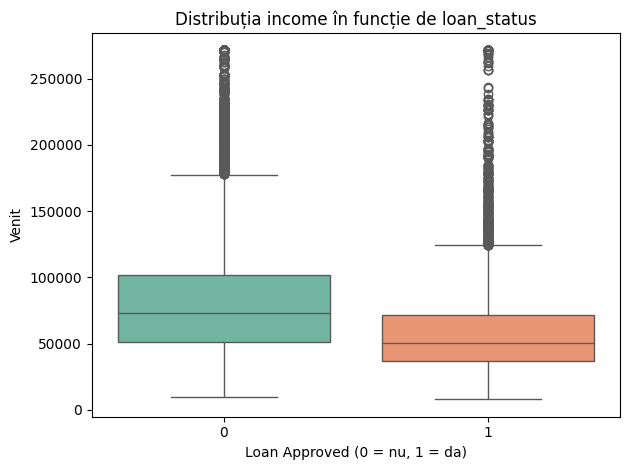

In [33]:
# Distribuția income în funcție de loan_status

sns.boxplot(data=df, x='loan_status', y='income', palette='Set2')
plt.title("Distribuția income în funcție de loan_status")
plt.xlabel("Loan Approved (0 = nu, 1 = da)")
plt.ylabel("Venit")
plt.tight_layout()
plt.show()

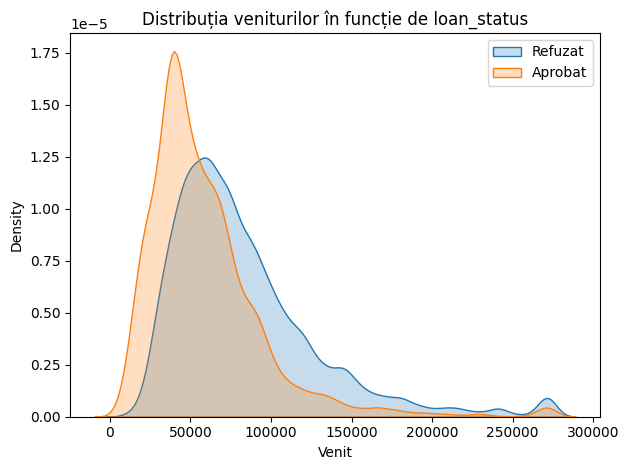

In [35]:
# KDE comparativ: venit aprobați vs. refuzați

sns.kdeplot(data=df[df['loan_status'] == 0]['income'], label='Refuzat', fill=True)
sns.kdeplot(data=df[df['loan_status'] == 1]['income'], label='Aprobat', fill=True)
plt.title("Distribuția veniturilor în funcție de loan_status")
plt.xlabel("Venit")
plt.legend()
plt.tight_layout()
plt.show()

##### II.5 Variabila 'exp_years'

In [36]:
# Statistici descriptive

print("Statistici descriptive pentru 'exp_years':")
print(df['exp_years'].describe())
print(f"Skewness: {df['exp_years'].skew():.2f}")
print(f"Kurtosis: {df['exp_years'].kurtosis():.2f}")

Statistici descriptive pentru 'exp_years':
count   45,000.00
mean         5.41
std          6.06
min          0.00
25%          1.00
50%          4.00
75%          8.00
max        125.00
Name: exp_years, dtype: float64
Skewness: 2.59
Kurtosis: 19.17


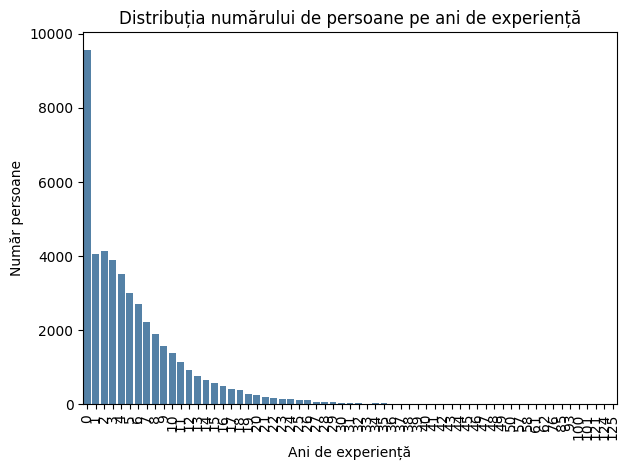

In [37]:
# Countplot

sns.countplot(data=df, x='exp_years', color='steelblue')
plt.title("Distribuția numărului de persoane pe ani de experiență")
plt.xlabel("Ani de experiență")
plt.ylabel("Număr persoane")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

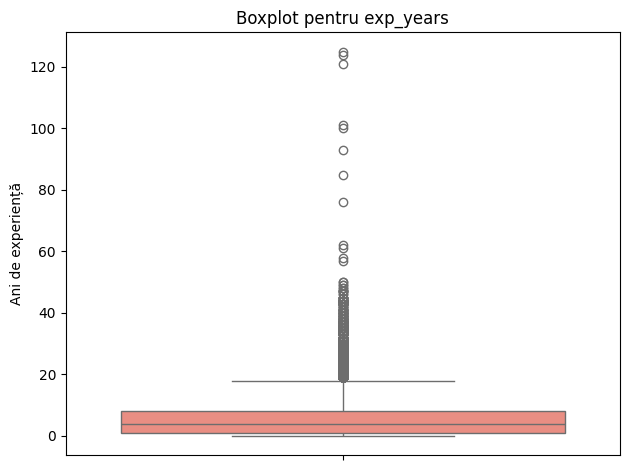

In [38]:
# Box-plot

sns.boxplot(y=df['exp_years'], color='salmon')
plt.title("Boxplot pentru exp_years")
plt.ylabel("Ani de experiență")
plt.tight_layout()
plt.show()

In [39]:
cap_value = df['exp_years'].quantile(0.99)

df['exp_years'] = df['exp_years'].apply(lambda x: min(x, cap_value))

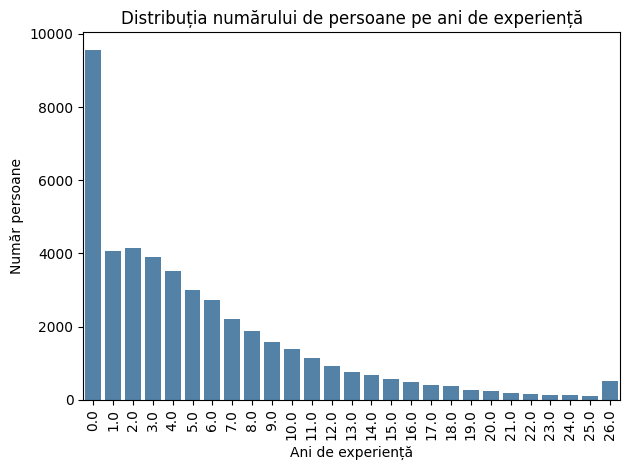

In [40]:
# Noua distributie

sns.countplot(data=df, x='exp_years', color='steelblue')
plt.title("Distribuția numărului de persoane pe ani de experiență")
plt.xlabel("Ani de experiență")
plt.ylabel("Număr persoane")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

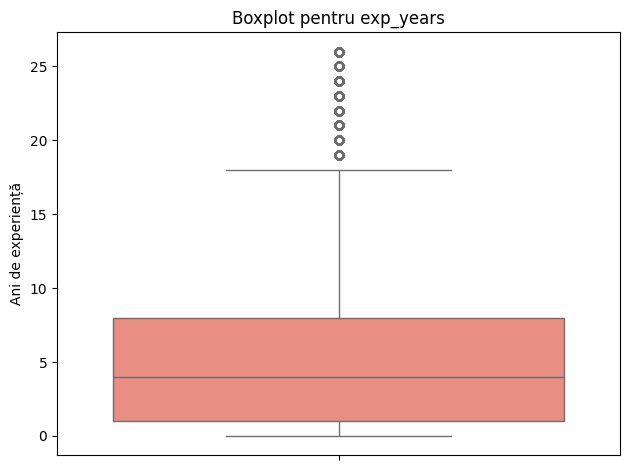

In [41]:
# Noul box-plot

sns.boxplot(y=df['exp_years'], color='salmon')
plt.title("Boxplot pentru exp_years")
plt.ylabel("Ani de experiență")
plt.tight_layout()
plt.show()

<ipython-input-42-595de5330f58>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y='exp_years', palette='Set2')


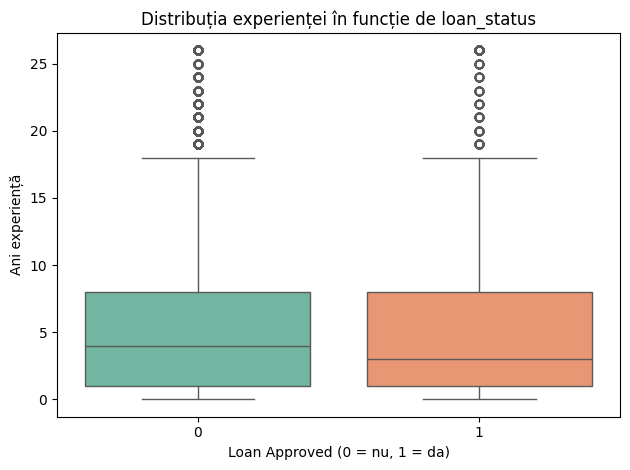

In [42]:
# Distribuție în funcție de loan_status

sns.boxplot(data=df, x='loan_status', y='exp_years', palette='Set2')
plt.title("Distribuția experienței în funcție de loan_status")
plt.xlabel("Loan Approved (0 = nu, 1 = da)")
plt.ylabel("Ani experiență")
plt.tight_layout()
plt.show()

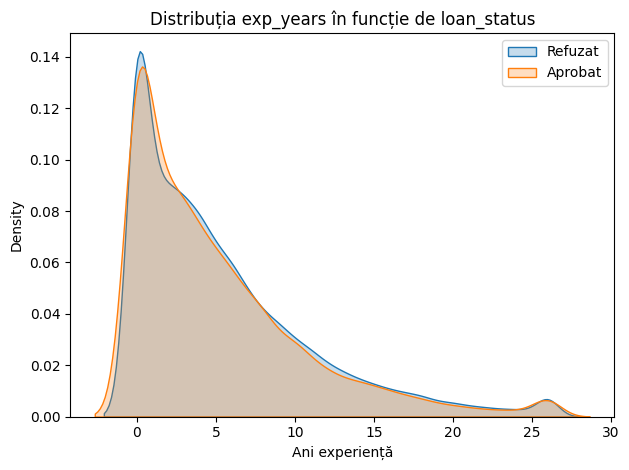

In [43]:
sns.kdeplot(data=df[df['loan_status'] == 0]['exp_years'], label='Refuzat', fill=True)
sns.kdeplot(data=df[df['loan_status'] == 1]['exp_years'], label='Aprobat', fill=True)
plt.title("Distribuția exp_years în funcție de loan_status")
plt.xlabel("Ani experiență")
plt.legend()
plt.tight_layout()
plt.show()

##### II.6 Variabila 'home_owner'


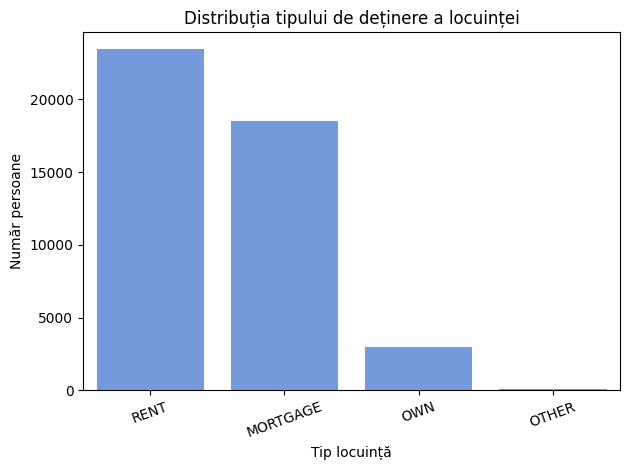

In [44]:
# Distributia variabilei

sns.countplot(data=df, x='home_owner', order=df['home_owner'].value_counts().index, color='cornflowerblue')
plt.title("Distribuția tipului de deținere a locuinței")
plt.xlabel("Tip locuință")
plt.ylabel("Număr persoane")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

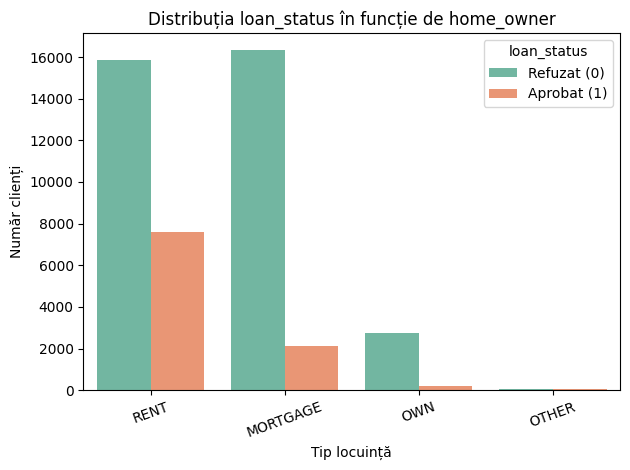

In [45]:
# Distribuția home_owner în funcție de loan_status

sns.countplot(data=df, x='home_owner', hue='loan_status',
              order=df['home_owner'].value_counts().index,
              palette='Set2')
plt.title("Distribuția loan_status în funcție de home_owner")
plt.xlabel("Tip locuință")
plt.ylabel("Număr clienți")
plt.legend(title='loan_status', labels=['Refuzat (0)', 'Aprobat (1)'])
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

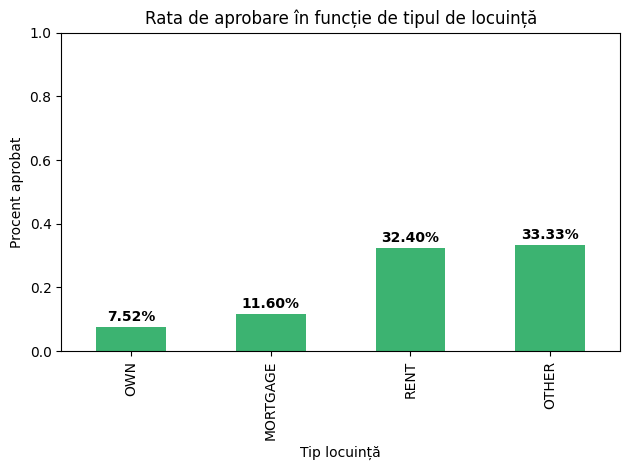

In [46]:
# Rată de aprobare per categorie (cu etichete deasupra)

approval_by_home = df.groupby('home_owner')['loan_status'].mean().sort_values()

ax = approval_by_home.plot(kind='bar', color='mediumseagreen')
plt.title("Rata de aprobare în funcție de tipul de locuință")
plt.ylabel("Procent aprobat")
plt.xlabel("Tip locuință")
plt.ylim(0, 1)

# Adaugă etichete procentuale
for i, v in enumerate(approval_by_home):
    ax.text(i, v + 0.02, f"{v:.2%}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

##### II.7 Variabila 'loan amt'

In [47]:
# Statistici descriptive

print("Statistici descriptive pentru 'loan_amt':")
print(df['loan_amt'].describe())
print(f"Skewness: {df['loan_amt'].skew():.2f}")
print(f"Kurtosis: {df['loan_amt'].kurtosis():.2f}")

Statistici descriptive pentru 'loan_amt':
count   45,000.00
mean     9,583.16
std      6,314.89
min        500.00
25%      5,000.00
50%      8,000.00
75%     12,237.25
max     35,000.00
Name: loan_amt, dtype: float64
Skewness: 1.18
Kurtosis: 1.35


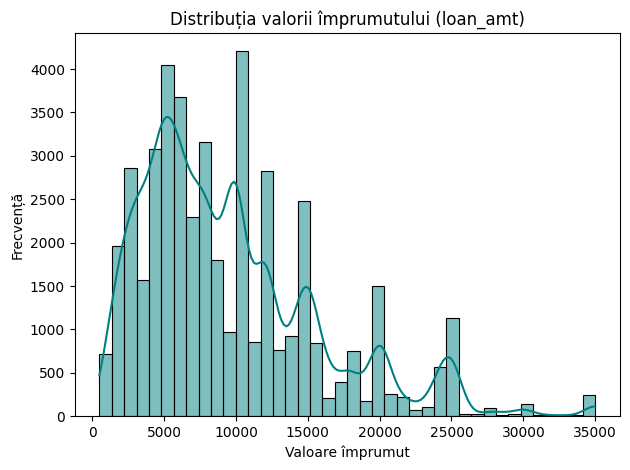

In [48]:
# Histogramă + KDE

sns.histplot(df['loan_amt'], bins=40, kde=True, color='teal')
plt.title("Distribuția valorii împrumutului (loan_amt)")
plt.xlabel("Valoare împrumut")
plt.ylabel("Frecvență")
plt.tight_layout()
plt.show()

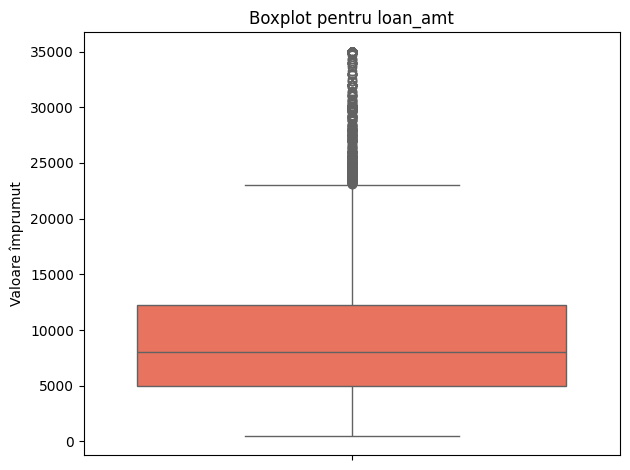

In [49]:
# Box-plot

sns.boxplot(y=df['loan_amt'], color='tomato')
plt.title("Boxplot pentru loan_amt")
plt.ylabel("Valoare împrumut")
plt.tight_layout()
plt.show()

<ipython-input-50-51319b86aac7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y='loan_amt', palette='Set2')


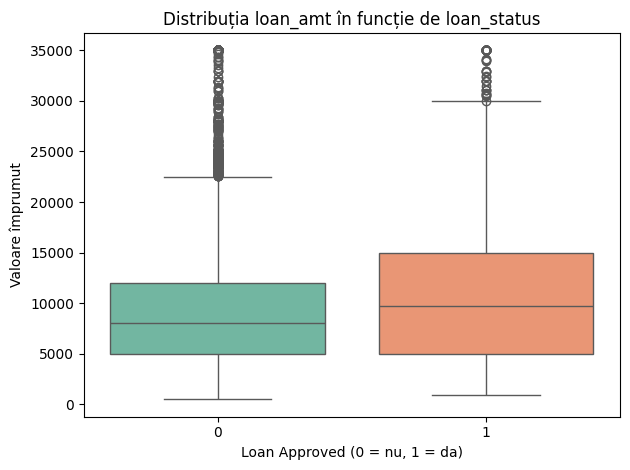

In [50]:
# Distribuție în funcție de loan_status

sns.boxplot(data=df, x='loan_status', y='loan_amt', palette='Set2')
plt.title("Distribuția loan_amt în funcție de loan_status")
plt.xlabel("Loan Approved (0 = nu, 1 = da)")
plt.ylabel("Valoare împrumut")
plt.tight_layout()
plt.show()

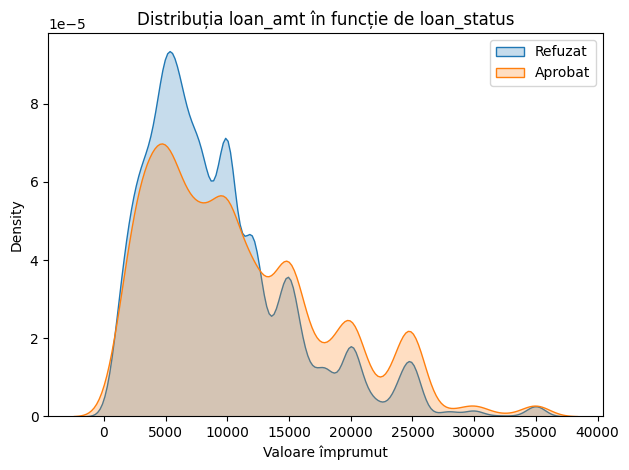

In [51]:
# KDE comparativ (refuzați vs. aprobați)

sns.kdeplot(data=df[df['loan_status'] == 0]['loan_amt'], label='Refuzat', fill=True)
sns.kdeplot(data=df[df['loan_status'] == 1]['loan_amt'], label='Aprobat', fill=True)
plt.title("Distribuția loan_amt în funcție de loan_status")
plt.xlabel("Valoare împrumut")
plt.legend()
plt.tight_layout()
plt.show()

##### II.8 Variabila 'loan_purpose'

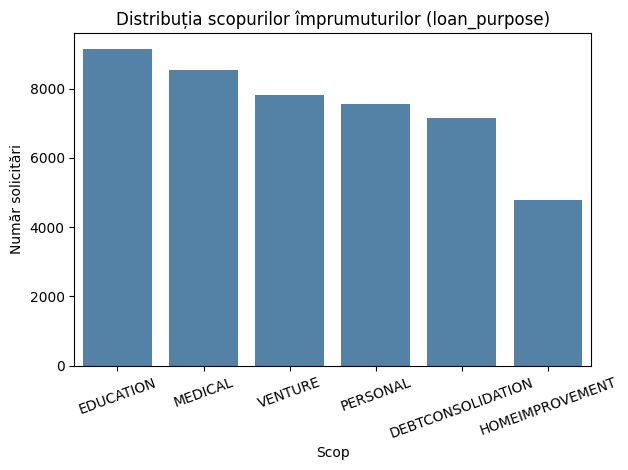

In [52]:
# Distribuția frecvențelor

sns.countplot(data=df, x='loan_purpose', order=df['loan_purpose'].value_counts().index, color='steelblue')
plt.title("Distribuția scopurilor împrumuturilor (loan_purpose)")
plt.xlabel("Scop")
plt.ylabel("Număr solicitări")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

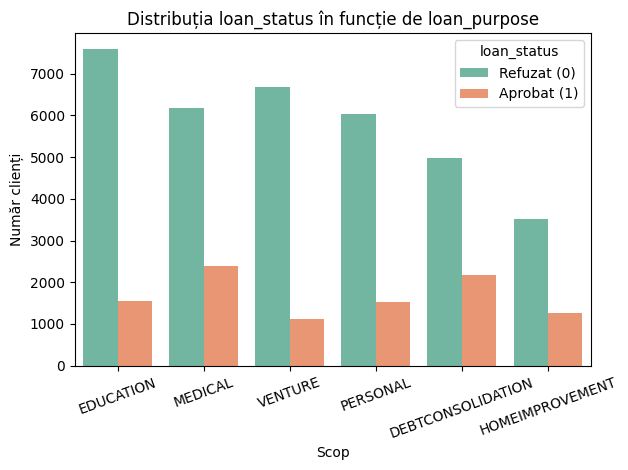

In [53]:
# Distribuția loan_status în funcție de loan_purpose

sns.countplot(data=df, x='loan_purpose', hue='loan_status',
              order=df['loan_purpose'].value_counts().index,
              palette='Set2')
plt.title("Distribuția loan_status în funcție de loan_purpose")
plt.xlabel("Scop")
plt.ylabel("Număr clienți")
plt.legend(title='loan_status', labels=['Refuzat (0)', 'Aprobat (1)'])
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

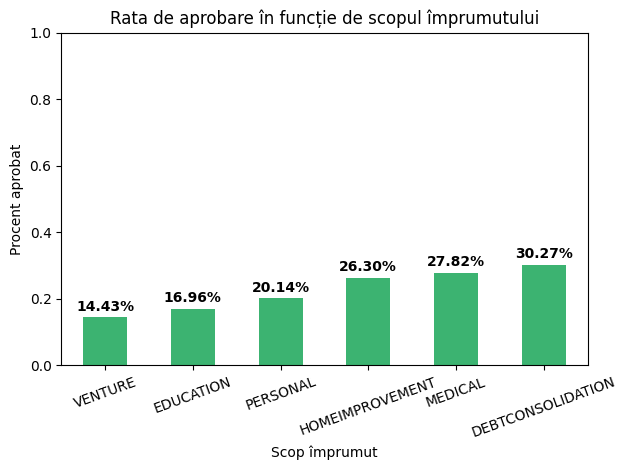

In [54]:
# Rată de aprobare per categorie

approval_by_purpose = df.groupby('loan_purpose')['loan_status'].mean().sort_values()

ax = approval_by_purpose.plot(kind='bar', color='mediumseagreen')
plt.title("Rata de aprobare în funcție de scopul împrumutului")
plt.ylabel("Procent aprobat")
plt.xlabel("Scop împrumut")
plt.ylim(0, 1)
plt.xticks(rotation=20)

# Adăugăm etichete cu procente
for i, v in enumerate(approval_by_purpose):
    ax.text(i, v + 0.02, f"{v:.2%}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

##### II.9 Variabila 'int_rate'

In [55]:
# Statistici descriptive

print("Statistici descriptive pentru 'int_rate':")
print(df['int_rate'].describe())
print(f"Skewness: {df['int_rate'].skew():.2f}")
print(f"Kurtosis: {df['int_rate'].kurtosis():.2f}")

Statistici descriptive pentru 'int_rate':
count   45,000.00
mean        11.01
std          2.98
min          5.42
25%          8.59
50%         11.01
75%         12.99
max         20.00
Name: int_rate, dtype: float64
Skewness: 0.21
Kurtosis: -0.42


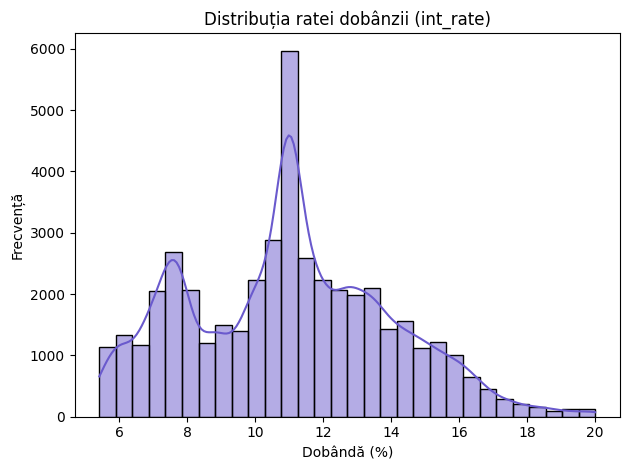

In [56]:
# Histogramă + KDE

sns.histplot(df['int_rate'], bins=30, kde=True, color='slateblue')
plt.title("Distribuția ratei dobânzii (int_rate)")
plt.xlabel("Dobândă (%)")
plt.ylabel("Frecvență")
plt.tight_layout()
plt.show()

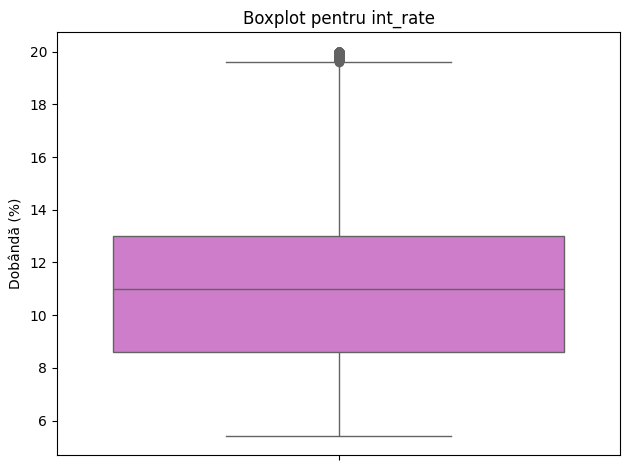

In [57]:
# Box-plot

sns.boxplot(y=df['int_rate'], color='orchid')
plt.title("Boxplot pentru int_rate")
plt.ylabel("Dobândă (%)")
plt.tight_layout()
plt.show()

<ipython-input-58-39e9bb5e168f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y='int_rate', palette='Set2')


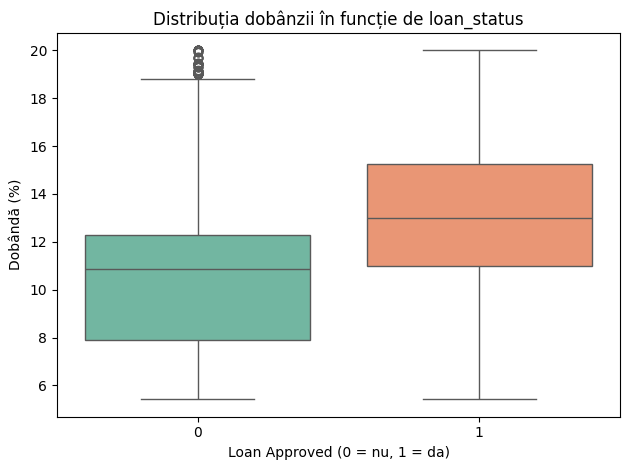

In [58]:
# Distribuția în funcție de loan_status

sns.boxplot(data=df, x='loan_status', y='int_rate', palette='Set2')
plt.title("Distribuția dobânzii în funcție de loan_status")
plt.xlabel("Loan Approved (0 = nu, 1 = da)")
plt.ylabel("Dobândă (%)")
plt.tight_layout()
plt.show()

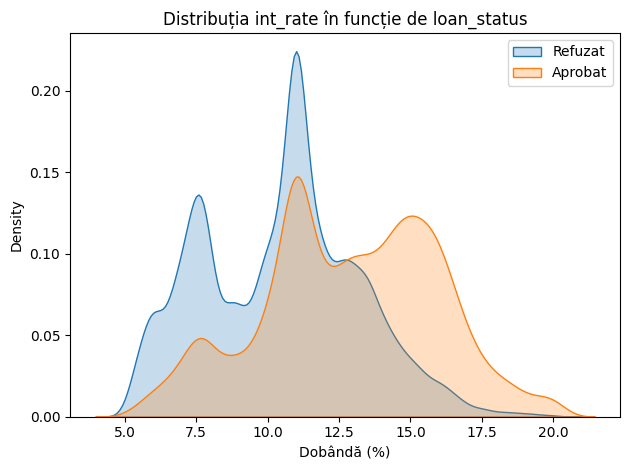

In [61]:
#  KDE comparativ (refuzați vs. aprobați)

sns.kdeplot(data=df[df['loan_status'] == 0]['int_rate'], label='Refuzat', fill=True)
sns.kdeplot(data=df[df['loan_status'] == 1]['int_rate'], label='Aprobat', fill=True)
plt.title("Distribuția int_rate în funcție de loan_status")
plt.xlabel("Dobândă (%)")
plt.legend()
plt.tight_layout()
plt.show()

##### II.10 Variabila 'income ratio'

In [63]:
# Statistici descriptive

print("Statistici descriptive pentru 'income_ratio':")
print(df['income_ratio'].describe())
print(f"Skewness: {df['income_ratio'].skew():.2f}")
print(f"Kurtosis: {df['income_ratio'].kurtosis():.2f}")

Statistici descriptive pentru 'income_ratio':
count   45,000.00
mean         0.14
std          0.09
min          0.00
25%          0.07
50%          0.12
75%          0.19
max          0.66
Name: income_ratio, dtype: float64
Skewness: 1.03
Kurtosis: 1.08


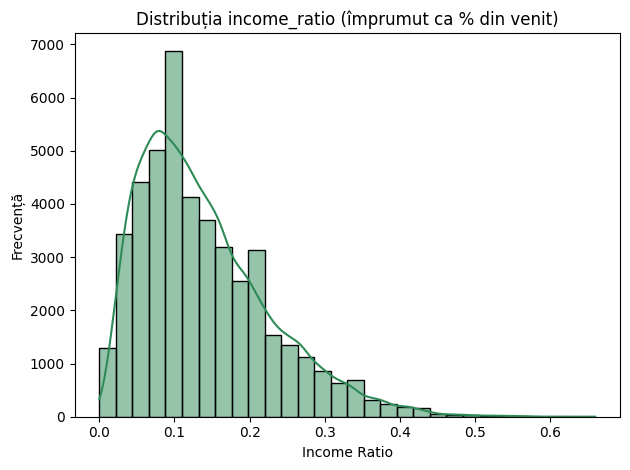

In [64]:
# Histograma

sns.histplot(df['income_ratio'], bins=30, kde=True, color='seagreen')
plt.title("Distribuția income_ratio (împrumut ca % din venit)")
plt.xlabel("Income Ratio")
plt.ylabel("Frecvență")
plt.tight_layout()
plt.show()

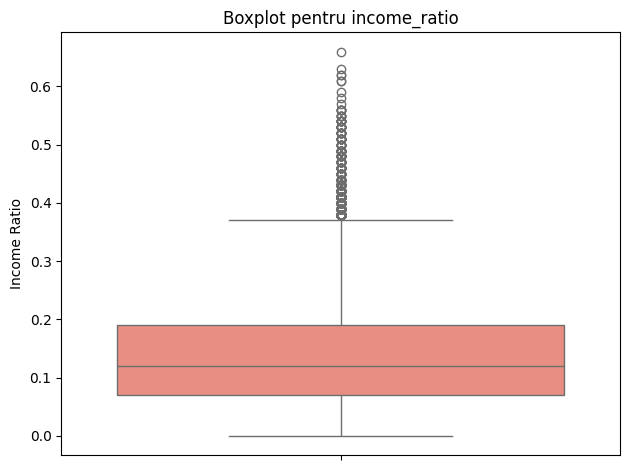

In [65]:
# Box-plot

sns.boxplot(y=df['income_ratio'], color='salmon')
plt.title("Boxplot pentru income_ratio")
plt.ylabel("Income Ratio")
plt.tight_layout()
plt.show()

In [68]:
# Winsorizam cu valoarea cuantilei 99

cap_value = df['income_ratio'].quantile(0.99)
print(f"Valoare capare propusă (p99): {cap_value:.4f}")

df['income_ratio'] = df['income_ratio'].apply(lambda x: min(x, cap_value))

Valoare capare propusă (p99): 0.4000


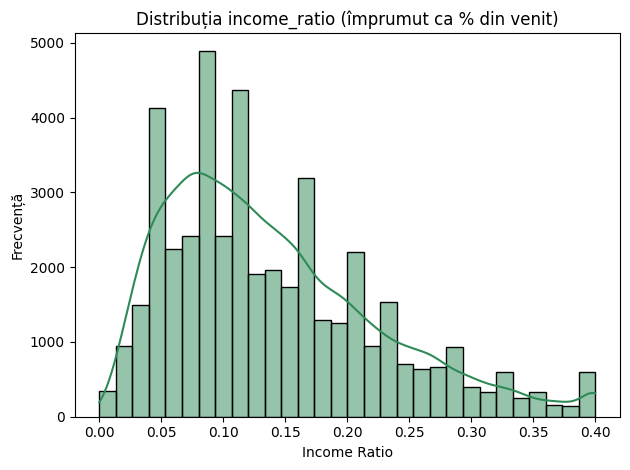

In [69]:
# Noua histograma

sns.histplot(df['income_ratio'], bins=30, kde=True, color='seagreen')
plt.title("Distribuția income_ratio (împrumut ca % din venit)")
plt.xlabel("Income Ratio")
plt.ylabel("Frecvență")
plt.tight_layout()
plt.show()

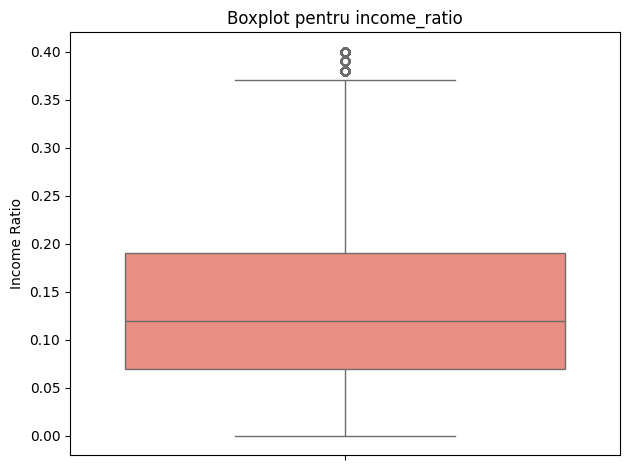

In [70]:
# Noul box-plot

sns.boxplot(y=df['income_ratio'], color='salmon')
plt.title("Boxplot pentru income_ratio")
plt.ylabel("Income Ratio")
plt.tight_layout()
plt.show()

<ipython-input-71-d43b650bf055>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y='income_ratio', palette='Set2')


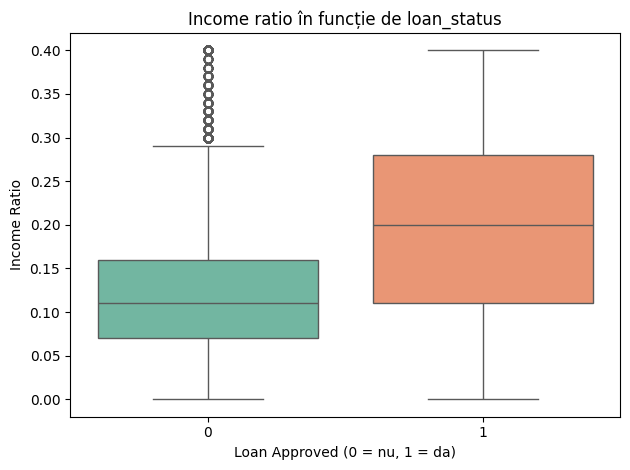

In [71]:
# Distribuția income_ratio în funcție de loan_status

sns.boxplot(data=df, x='loan_status', y='income_ratio', palette='Set2')
plt.title("Income ratio în funcție de loan_status")
plt.xlabel("Loan Approved (0 = nu, 1 = da)")
plt.ylabel("Income Ratio")
plt.tight_layout()
plt.show()

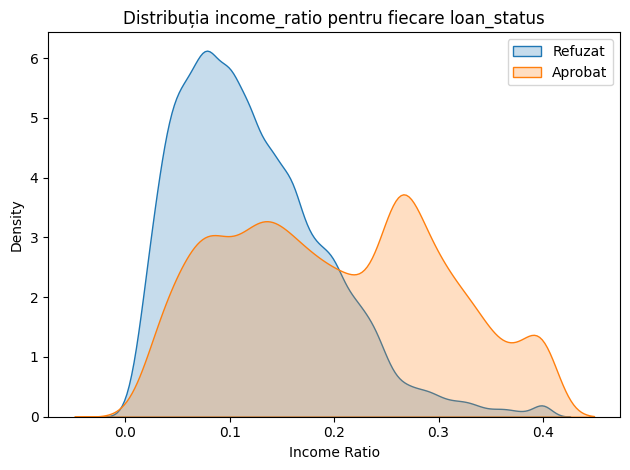

In [73]:
# KDE comparativ (refuzați vs. aprobați)

sns.kdeplot(data=df[df['loan_status'] == 0]['income_ratio'], label='Refuzat', fill=True)
sns.kdeplot(data=df[df['loan_status'] == 1]['income_ratio'], label='Aprobat', fill=True)
plt.title("Distribuția income_ratio pentru fiecare loan_status")
plt.xlabel("Income Ratio")
plt.legend()
plt.tight_layout()
plt.show()

##### II.11 Variabila 'cred_hist_len'

In [74]:
# Statistici descriptive

print("Statistici descriptive pentru 'cred_hist_len':")
print(df['cred_hist_len'].describe())
print(f"Skewness: {df['cred_hist_len'].skew():.2f}")
print(f"Kurtosis: {df['cred_hist_len'].kurtosis():.2f}")

Statistici descriptive pentru 'cred_hist_len':
count   45,000.00
mean         5.87
std          3.88
min          2.00
25%          3.00
50%          4.00
75%          8.00
max         30.00
Name: cred_hist_len, dtype: float64
Skewness: 1.63
Kurtosis: 3.73


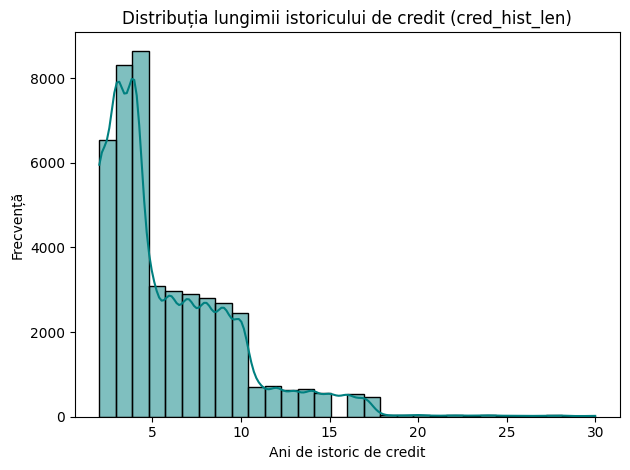

In [75]:
# Distributie

sns.histplot(df['cred_hist_len'], bins=30, kde=True, color='teal')
plt.title("Distribuția lungimii istoricului de credit (cred_hist_len)")
plt.xlabel("Ani de istoric de credit")
plt.ylabel("Frecvență")
plt.tight_layout()
plt.show()

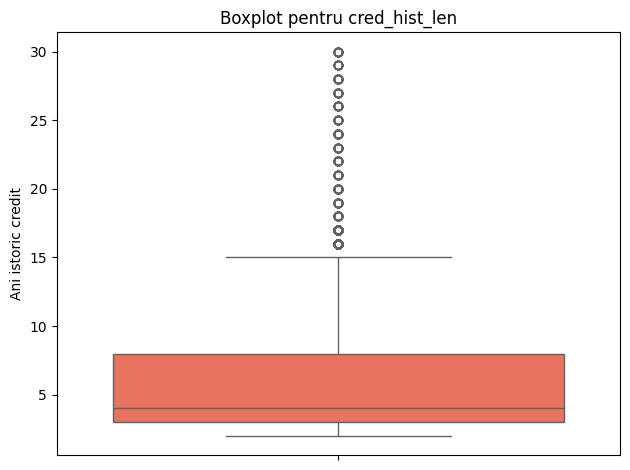

In [76]:
#Box-plot

sns.boxplot(y=df['cred_hist_len'], color='tomato')
plt.title("Boxplot pentru cred_hist_len")
plt.ylabel("Ani istoric credit")
plt.tight_layout()
plt.show()

<ipython-input-77-a7e0118b6f98>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y='cred_hist_len', palette='Set2')


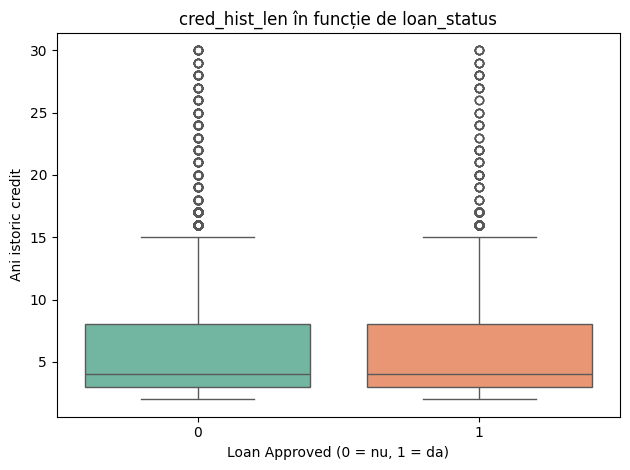

In [77]:
# Distribuție în funcție de loan_status

sns.boxplot(data=df, x='loan_status', y='cred_hist_len', palette='Set2')
plt.title("cred_hist_len în funcție de loan_status")
plt.xlabel("Loan Approved (0 = nu, 1 = da)")
plt.ylabel("Ani istoric credit")
plt.tight_layout()
plt.show()

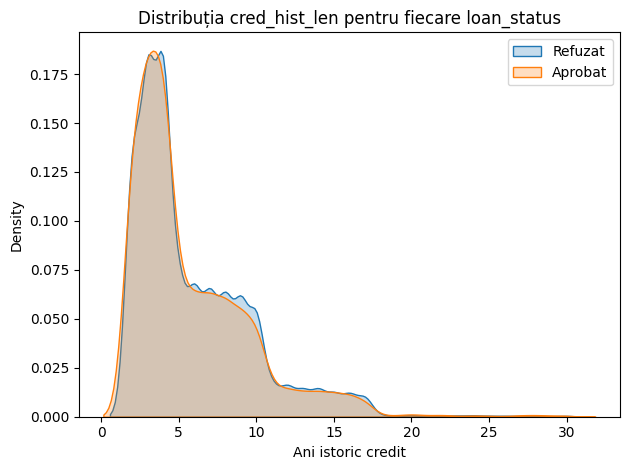

In [79]:
# KDE comparativ aprobați vs. refuzați

sns.kdeplot(data=df[df['loan_status'] == 0]['cred_hist_len'], label='Refuzat', fill=True)
sns.kdeplot(data=df[df['loan_status'] == 1]['cred_hist_len'], label='Aprobat', fill=True)
plt.title("Distribuția cred_hist_len pentru fiecare loan_status")
plt.xlabel("Ani istoric credit")
plt.legend()
plt.tight_layout()
plt.show()

##### II.12 Variabila 'cred_score'

In [82]:
# Statistici descriptive

print("Statistici descriptive pentru 'cred_score':")
print(df['cred_score'].describe())
print(f"Skewness: {df['cred_score'].skew():.2f}")
print(f"Kurtosis: {df['cred_score'].kurtosis():.2f}")

Statistici descriptive pentru 'cred_score':
count   45,000.00
mean       632.61
std         50.44
min        390.00
25%        601.00
50%        640.00
75%        670.00
max        850.00
Name: cred_score, dtype: float64
Skewness: -0.61
Kurtosis: 0.20


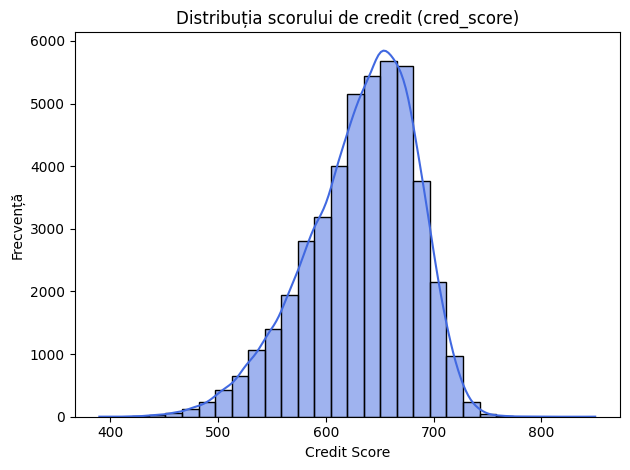

In [83]:
# Distributia

sns.histplot(df['cred_score'], bins=30, kde=True, color='royalblue')
plt.title("Distribuția scorului de credit (cred_score)")
plt.xlabel("Credit Score")
plt.ylabel("Frecvență")
plt.tight_layout()
plt.show()

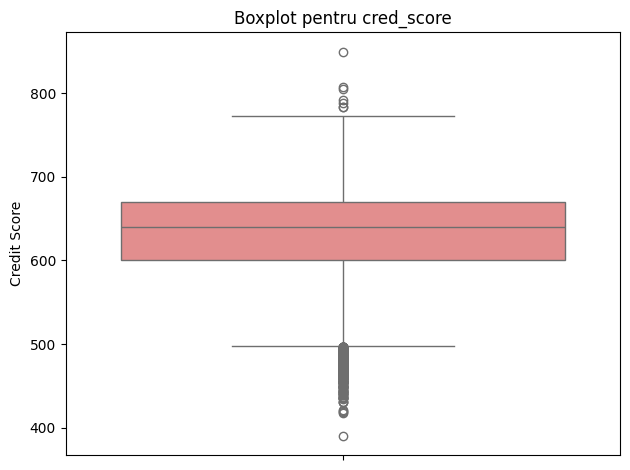

In [84]:
# Box-plot

sns.boxplot(y=df['cred_score'], color='lightcoral')
plt.title("Boxplot pentru cred_score")
plt.ylabel("Credit Score")
plt.tight_layout()
plt.show()

<ipython-input-85-822b91b54289>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y='cred_score', palette='Set2')


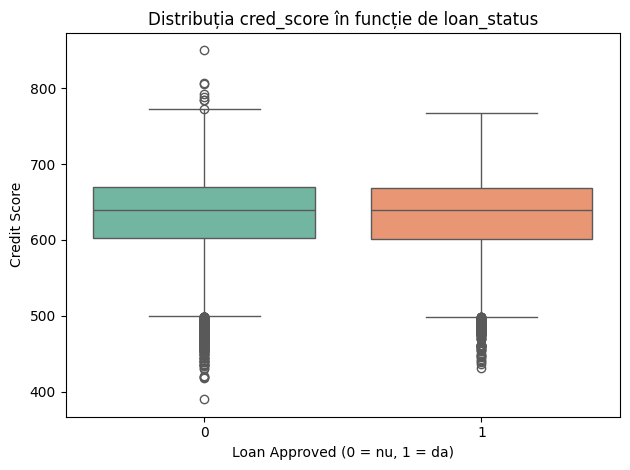

In [85]:
# Distributia in functie de loan_status

sns.boxplot(data=df, x='loan_status', y='cred_score', palette='Set2')
plt.title("Distribuția cred_score în funcție de loan_status")
plt.xlabel("Loan Approved (0 = nu, 1 = da)")
plt.ylabel("Credit Score")
plt.tight_layout()
plt.show()

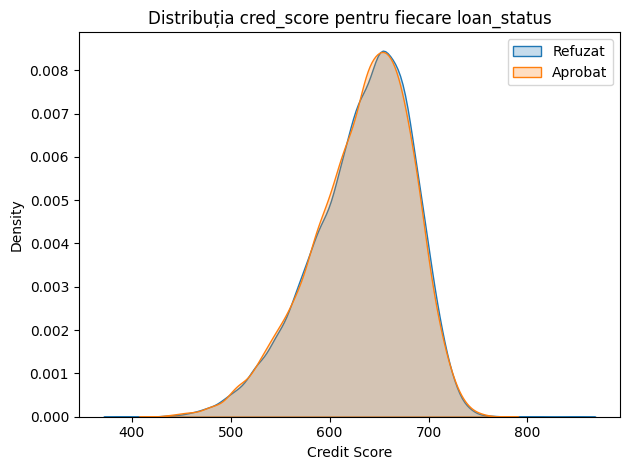

In [87]:
# KDE comparativ (aprobati & refuzati)

sns.kdeplot(data=df[df['loan_status'] == 0]['cred_score'], label='Refuzat', fill=True)
sns.kdeplot(data=df[df['loan_status'] == 1]['cred_score'], label='Aprobat', fill=True)
plt.title("Distribuția cred_score pentru fiecare loan_status")
plt.xlabel("Credit Score")
plt.legend()
plt.tight_layout()
plt.show()

##### II.13 Variabila 'has_default'

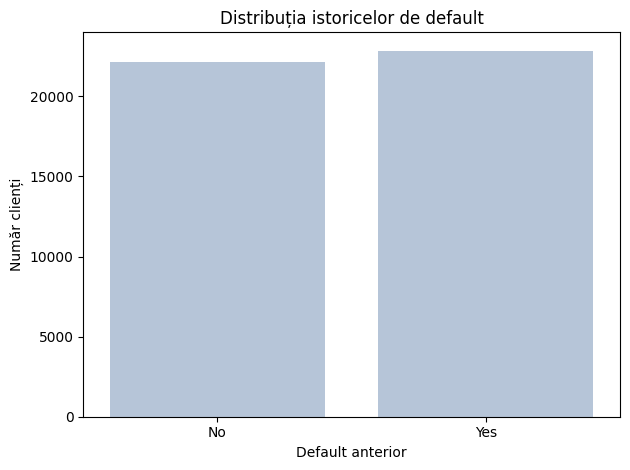

In [88]:
# Bar-chart cu frecvente

sns.countplot(x='has_default', data=df, color='lightsteelblue')
plt.title("Distribuția istoricelor de default")
plt.xlabel("Default anterior")
plt.ylabel("Număr clienți")
plt.tight_layout()
plt.show()

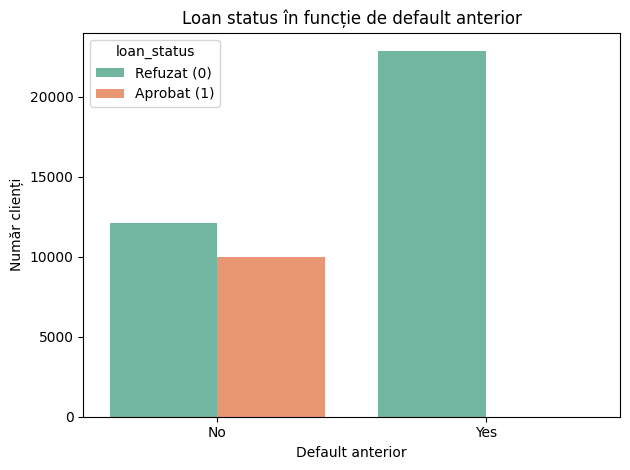

In [89]:
# Loan_status in functie de has_default
sns.countplot(x='has_default', hue='loan_status', data=df, palette='Set2')
plt.title("Loan status în funcție de default anterior")
plt.xlabel("Default anterior")
plt.ylabel("Număr clienți")
plt.legend(title='loan_status', labels=['Refuzat (0)', 'Aprobat (1)'])
plt.tight_layout()
plt.show()

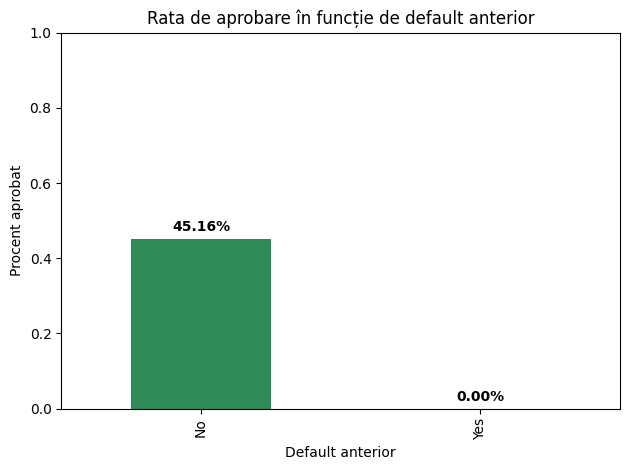

In [90]:
# Rata de aprobare

approval_by_default = df.groupby('has_default')['loan_status'].mean()

ax = approval_by_default.plot(kind='bar', color='seagreen')
plt.title("Rata de aprobare în funcție de default anterior")
plt.ylabel("Procent aprobat")
plt.xlabel("Default anterior")
plt.ylim(0, 1)

# Adaugă etichete
for i, v in enumerate(approval_by_default):
    ax.text(i, v + 0.02, f"{v:.2%}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [91]:
# Codificam numeric variabila 'has_default'

df['has_default'] = df['has_default'].map({'Yes': 1, 'No': 0})
print(df['has_default'].value_counts(dropna=False))

has_default
1    22858
0    22142
Name: count, dtype: int64


##### II.14 Variabila 'loan status'

In [94]:
# Număr absolut de observații
print("Distribuția absolută a valorilor în 'loan_status':")
print(df['loan_status'].value_counts())

# Distribuție procentuală
print("\nDistribuția procentuală:")
print(df['loan_status'].value_counts(normalize=True).apply(lambda x: f"{x:.2%}"))

Distribuția absolută a valorilor în 'loan_status':
loan_status
0    35000
1    10000
Name: count, dtype: int64

Distribuția procentuală:
loan_status
0    77.78%
1    22.22%
Name: proportion, dtype: object


<ipython-input-93-06e4afd223f1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='loan_status', data=df, palette='Set2')


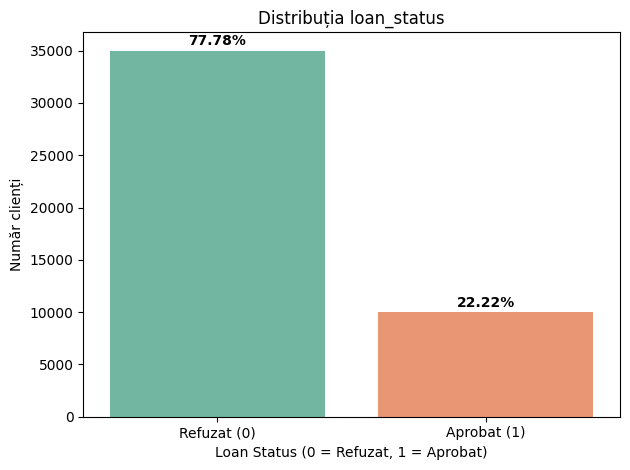

In [93]:
ax = sns.countplot(x='loan_status', data=df, palette='Set2')
plt.title("Distribuția loan_status")
plt.xlabel("Loan Status (0 = Refuzat, 1 = Aprobat)")
plt.ylabel("Număr clienți")
plt.xticks([0, 1], ['Refuzat (0)', 'Aprobat (1)'])

# Adaugă procente pe bare
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = height / total
    ax.text(p.get_x() + p.get_width() / 2., height + 500,
            f'{percentage:.2%}', ha="center", fontweight='bold')

plt.tight_layout()
plt.show()

In [95]:
# Selectăm variabilele numerice
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculăm corelațiile față de loan_status
loan_corr = df[numeric_cols].corr()['loan_status'].sort_values(ascending=False)

# Afișăm rezultatul
print("Corelațiile cu loan_status (descrescător):")
print(loan_corr)

Corelațiile cu loan_status (descrescător):
loan_status      1.00
income_ratio     0.39
int_rate         0.33
loan_amt         0.11
gender          -0.00
education       -0.00
cred_score      -0.01
cred_hist_len   -0.01
age             -0.02
exp_years       -0.02
income          -0.22
has_default     -0.54
Name: loan_status, dtype: float64


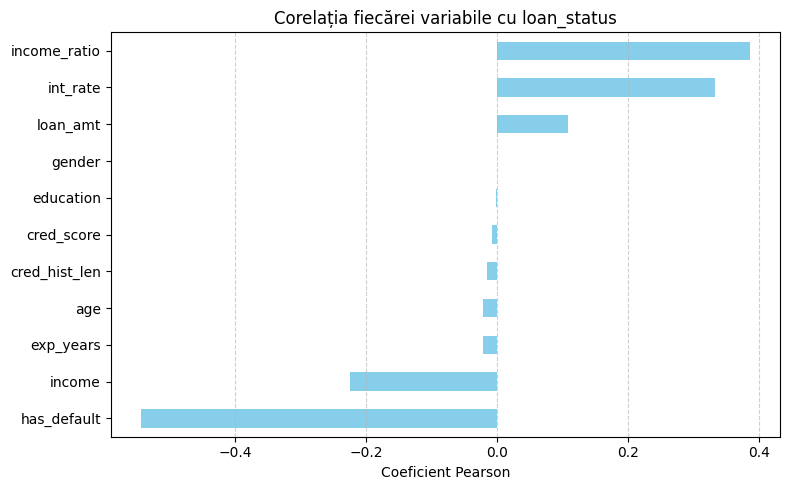

In [96]:
# Eliminăm loan_status (care are corelație 1 cu sine însuși)
loan_corr_no_self = loan_corr.drop('loan_status')

plt.figure(figsize=(8, 5))
loan_corr_no_self.plot(kind='barh', color='skyblue')
plt.title("Corelația fiecărei variabile cu loan_status")
plt.xlabel("Coeficient Pearson")
plt.gca().invert_yaxis()  # cea mai mare corelație sus
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [97]:
# Calculam coeficientul de corelatie Spearmann intre variabila educatie (ordinala) si loan_status (binara)

from scipy.stats import spearmanr

rho, p_value = spearmanr(df['education'], df['loan_status'])

print(f"Spearman rho: {rho:.3f}")
print(f"P-value: {p_value:.4f}")

Spearman rho: -0.001
P-value: 0.8274


# III. Simularea valorilor lipsa

In [ ]:
# Ne creem o funcție pentru a introduce valori lipsă în mod aleatoriu

def introduce_missing_values(df, fraction=0.05, exclude_column='loan_status', seed=42):

    """
    Funcția parcurge fiecare coloană din DataFrame (cu excepția celei țintă) și introduce
    valori lipsă (`NaN`) în poziții aleatorii, pentru a simula absența datelor.
    Parametri:
            df: dataframe-ul principal fara valori lipsa ce va fi modificat
            fraction: procentul dorit de missing values
            seed: setam un seed pentru a avea la fiecare rulare aceleasi valori lipsas

    Returns:
            df_missing: copia setului de date initial cu valori lipsa adaugate
    """

    np.random.seed(seed)
    df_missing = df.copy()

    for col in df.columns:
        if col == exclude_column:
            continue  # Sărim peste coloana țintă
        missing_indices = np.random.choice(df.index, size=int(fraction * len(df)), replace=False)
        df_missing.loc[missing_indices, col] = np.nan

    return df_missing



In [ ]:
df = introduce_missing_values(df, fraction=0.05, exclude_column='loan_status')

missing_values=df.isnull().sum()
print('Valori lipsă per coloană: ')
print(missing_values)

Valori lipsă per coloană: 
age              2250
gender           2250
education        2250
income           2250
exp_years        2250
home_owner       2250
loan_amt         2250
loan_purpose     2250
int_rate         2250
income_ratio     2250
cred_hist_len    2250
cred_score       2250
has_default      2250
loan_status         0
dtype: int64


# III. (OLD) Analiza Exploratorie a Datelor (EDA)

In [ ]:
# Dimensiunea setului de date
print("Dimensiuni dataframe:", df.shape)

# Tipuri de date și valori lipsă
print("\nInfo dataframe:")
df.info()

Dimensiuni dataframe: (45000, 14)

Info dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            42750 non-null  float64
 1   gender         42750 non-null  object 
 2   education      42750 non-null  object 
 3   income         42750 non-null  float64
 4   exp_years      42750 non-null  float64
 5   home_owner     42750 non-null  object 
 6   loan_amt       42750 non-null  float64
 7   loan_purpose   42750 non-null  object 
 8   int_rate       42750 non-null  float64
 9   income_ratio   42750 non-null  float64
 10  cred_hist_len  42750 non-null  float64
 11  cred_score     42750 non-null  float64
 12  has_default    42750 non-null  object 
 13  loan_status    45000 non-null  int64  
dtypes: float64(8), int64(1), object(5)
memory usage: 4.8+ MB


In [ ]:
# Folosim describe() doar pentru coloanele numerice
print(df.describe().T)

# Formatăm valorile pentru a avea separator de mii și fără notație științifică
pd.options.display.float_format = '{:,.2f}'.format


                 count          mean           std      min       25%  \
age            42750.0     27.754971      6.048059    20.00     24.00   
income         42750.0  80131.081474  75446.278686  8000.00  47253.00   
exp_years      42750.0      5.424000      6.067629     0.00      1.00   
loan_amt       42750.0   9596.297333   6322.368834   500.00   5000.00   
int_rate       42750.0     11.008124      2.979035     5.42      8.59   
income_ratio   42750.0      0.139756      0.087139     0.00      0.07   
cred_hist_len  42750.0      5.870971      3.880192     2.00      3.00   
cred_score     42750.0    632.656234     50.434148   390.00    601.00   
loan_status    45000.0      0.222222      0.415744     0.00      0.00   

                    50%       75%         max  
age               26.00     30.00      144.00  
income         67049.50  95791.25  7200766.00  
exp_years          4.00      8.00      125.00  
loan_amt        8000.00  12250.00    35000.00  
int_rate          11.01     1

Transformam variabila 'education' in variabila ordinala

In [ ]:
# Observam valorile unice ale variabilei privind educatia

print("Valorile unice din coloana 'education':")
print(df['education'].unique())

Valorile unice din coloana 'education':
['Master' 'High School' 'Bachelor' nan 'Associate' 'Doctorate']


In [ ]:
# Definim maparea ordonată
edu_order = {
    'High School': 1,
    'Associate': 2,
    'Bachelor': 3,
    'Master': 4,
    'Doctorate': 5
}

# Aplicăm maparea pe coloana education
df['education'] = df['education'].map(edu_order)

Transformam variabila 'gender' in variabila binara

In [ ]:
# Observam valorile unice ale variabilei gender

print("Valorile unice din coloana 'gender':")
print(df['gender'].unique())

Valorile unice din coloana 'gender':
['female' 'male' nan]


In [ ]:
# Mapăm valorile binar
gender_map = {
    'male': 1,
    'female': 0
}

df['gender'] = df['gender'].map(gender_map)

Transformam variabila 'has_default' in variabila binara

In [ ]:
# Observam valorile unice ale variabilei gender

print("Valorile unice din 'has_default':")
print(df['has_default'].unique())

Valorile unice din 'has_default':
['No' 'Yes' nan]


In [ ]:
# Mapăm valorile binar
default_map = {
    'Yes': 1,
    'No': 0
}

df['has_default'] = df['has_default'].map(default_map)


Transformam variabilele 'loan purpose' si 'home owner' in variabile dummy

In [ ]:
# Observam valorile unice ale celor doua variabile
print("Valori unice în 'home_owner':")
print(df['home_owner'].unique())

print("\nValori unice în 'loan_purpose':")
print(df['loan_purpose'].unique())

Valori unice în 'home_owner':
['RENT' 'OWN' 'MORTGAGE' nan 'OTHER']

Valori unice în 'loan_purpose':
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION' nan]


In [ ]:
# Aplicăm one-hot encoding pentru cele două variabile
df = pd.get_dummies(df, columns=['home_owner', 'loan_purpose'], drop_first=True)


In [ ]:
# Dimensiunea setului de date
print("Dimensiuni dataframe:", df.shape)

# Noile tipuri de date
print("\nInfo dataframe:")
df.info()

Dimensiuni dataframe: (45000, 20)

Info dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           42750 non-null  float64
 1   gender                        42750 non-null  float64
 2   education                     42750 non-null  float64
 3   income                        42750 non-null  float64
 4   exp_years                     42750 non-null  float64
 5   loan_amt                      42750 non-null  float64
 6   int_rate                      42750 non-null  float64
 7   income_ratio                  42750 non-null  float64
 8   cred_hist_len                 42750 non-null  float64
 9   cred_score                    42750 non-null  float64
 10  has_default                   42750 non-null  float64
 11  loan_status                   45000 non-null  int64  
 12  home_owne

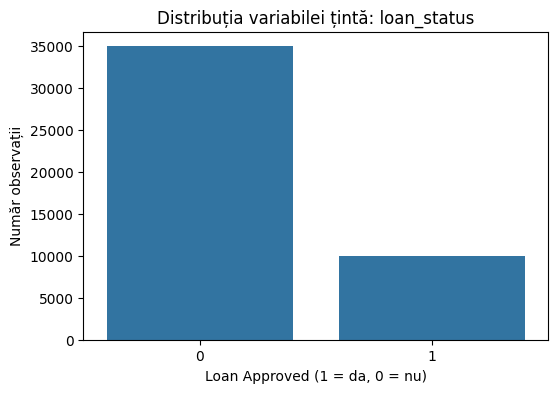

In [ ]:
# Distribuție target
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='loan_status')
plt.title("Distribuția variabilei țintă: loan_status")
plt.xlabel("Loan Approved (1 = da, 0 = nu)")
plt.ylabel("Număr observații")
plt.show()

####Variabila 'age'

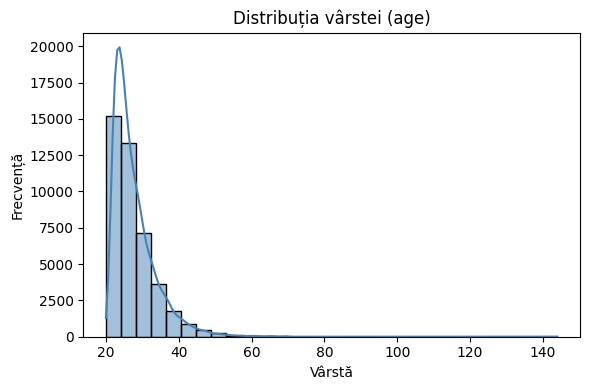

In [ ]:
# Distributia variabilei 'age'

plt.figure(figsize=(6, 4))
sns.histplot(df['age'], bins=30, kde=True, color='steelblue')
plt.title("Distribuția vârstei (age)")
plt.xlabel("Vârstă")
plt.ylabel("Frecvență")
plt.tight_layout()
plt.show()



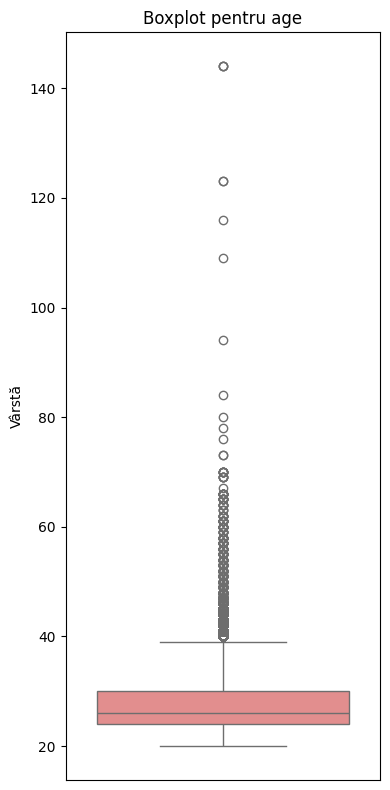

In [ ]:
# Box plot

plt.figure(figsize=(4, 8))
sns.boxplot(y=df['age'], color='lightcoral', orient='v')
plt.title("Boxplot pentru age")
plt.ylabel("Vârstă")
plt.xticks([])
plt.tight_layout()
plt.show()

Observam prezenta valorilor aberante, asadar vom rezolva aceasta problema in urmatoarele celule de cod

In [ ]:
# Winsorizam (capăm) vârsta maximă la 60

df['age'] = df['age'].apply(lambda x: min(x, 60))

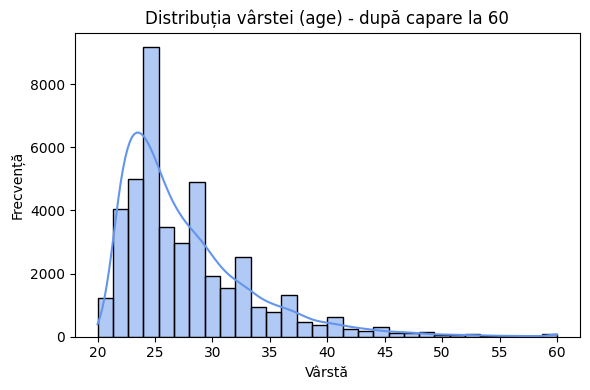

In [ ]:
# Noua histogramă

plt.figure(figsize=(6, 4))
sns.histplot(df['age'], bins=30, kde=True, color='cornflowerblue')
plt.title("Distribuția vârstei (age) - după capare la 60")
plt.xlabel("Vârstă")
plt.ylabel("Frecvență")
plt.tight_layout()
plt.show()

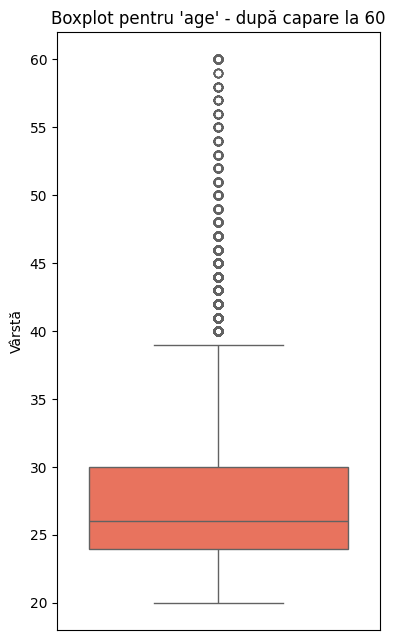

In [ ]:
# Noul box-plot

plt.figure(figsize=(4, 6.5))
sns.boxplot(y=df['age'], color='tomato', orient='v')
plt.title("Boxplot pentru 'age' - după capare la 60")
plt.ylabel("Vârstă")
plt.xticks([])
plt.tight_layout()
plt.show()

In continuare, vom trece la partea de imputare a valorilor lipsa pentru 'age'